# Caso LN - Serie de tiempo - Regresión - Predicción de la Demanda y Devoluciones de Productos Perecederos

En este notebook quiero construir modelos de Regresión y de Redes Neuronales para replicar o mejorar el trabajo realizado en 2005 para la Distribución de Periódicos y otros 30 productos editoriales. El set de datos fue aportado por la editorial, pero con el objetivo de preservar el secreto comercial, se eliminaron o cambiaron todos los datos suceptibles.

1. Los datos provienen de una base real. Se extrajeron datasets de Carga y Demanda de un Agente particular. Se completaron y normalizaron.

2. Se representan los datos

3. Se prueba un modelo SVM

4. Se prueba una Regresión Lineal <------------- (no es aplicable)

5. Se prueba una Red Neuronal (no está hecho)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [2]:
def sigmoid_function(x,w0, w1):
    '''Equivalente a perceptron con funcion de activacion sigmoide'''
    z = w0 + w1*x #notar que es una funcion lineal
    y = 1/(1 + np.exp(-z))   #notar que es una composicion
    return y

In [3]:
df = pd.read_csv('D:\AGC\Documentos\Euler\Datasets\Prod1_Id249.csv', delimiter = ";", parse_dates=['FechaCirculacion'])
# df['FechaCirculacion'] = pd.to_datetime(df['FechaCirculacion'], format='%Y%b%d')

Devolucion_Objetivo = 80

format='%d%b%Y'
print("Head:     ------------------------")
print(df.head(5))
print()
print("Info:     ------------------------")
print(df.dtypes)
print()
print("Describe: ------------------------")
print(df.describe())
print("==================================")

# x = df.devolucion
# print(x)
# y = sigmoid_function(x, 0,1)
# plt.plot(x,sigmoid_function(x, 0,1), label = 'w0 = 0, w1 = 1')
# plt.plot(x,sigmoid_function(x, 0,-1), label = 'w0 = 0, w1 = -1')

# plt.legend()
# plt.tight_layout()
# plt.savefig('regresion_logistica.png', dpi = 400)

# plt.show()

Head:     ------------------------
  FechaCirculacion  carga  devolucion  tapa
0       2002-06-03    620         197     2
1       2002-06-10    550         147     1
2       2002-06-17    650         236     2
3       2002-06-24    520         128     1
4       2002-07-01    520         106     1

Info:     ------------------------
FechaCirculacion    datetime64[ns]
carga                        int64
devolucion                   int64
tapa                         int64
dtype: object

Describe: ------------------------
             carga  devolucion        tapa
count   171.000000  171.000000  171.000000
mean    599.707602  154.438596    1.269006
std      75.378862   64.433737    0.482797
min     450.000000   63.000000    1.000000
25%     560.000000  122.000000    1.000000
50%     600.000000  147.000000    1.000000
75%     605.000000  172.000000    1.500000
max    1050.000000  664.000000    3.000000


C:\Users\Alejandro\Miniconda3\envs\datascience\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


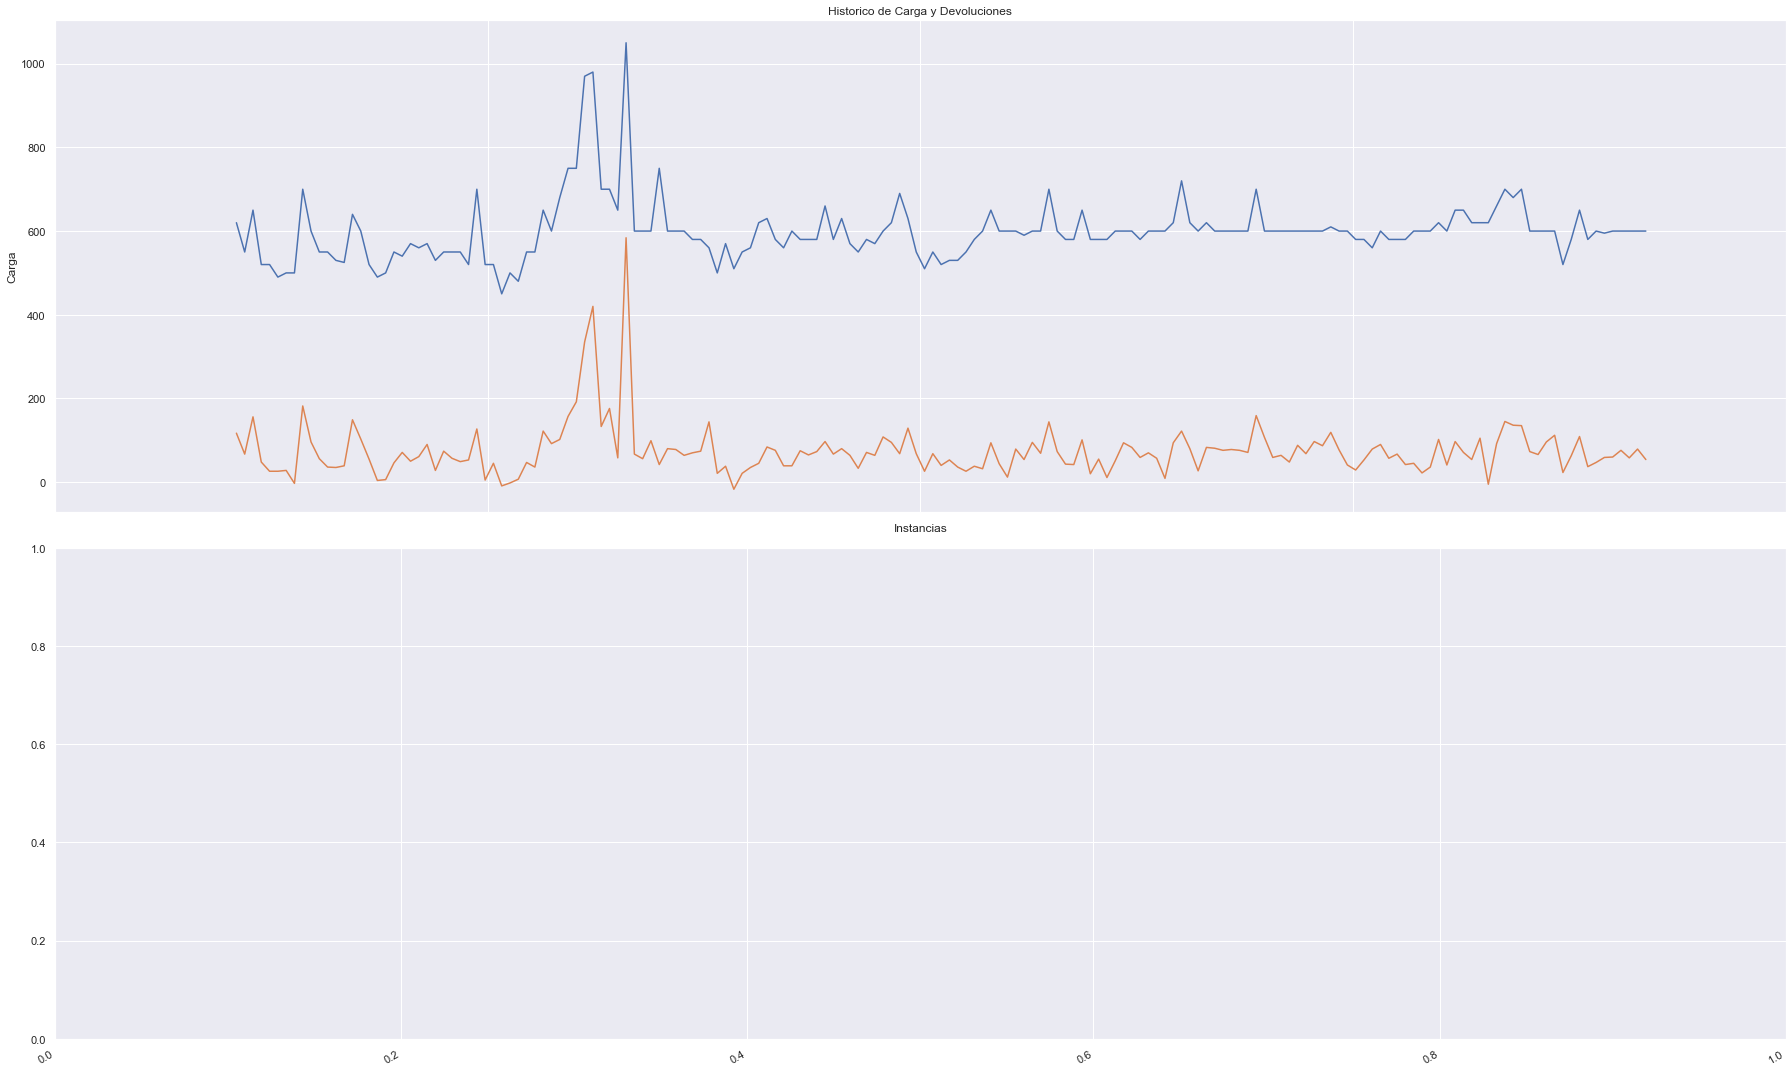

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, [ax, ax1] = plt.subplots(nrows = 2, ncols= 1)

ax.plot(df.FechaCirculacion, df.carga, df.FechaCirculacion, (df.devolucion - Devolucion_Objetivo))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(df['FechaCirculacion'][0], 'Y')
datemax = np.datetime64(df['FechaCirculacion'][170], 'Y') + np.timedelta64(1, 'Y')

ax.set_xlim(datemin, datemax)

ax.grid(True)

fig.autofmt_xdate()
ax.set_xlabel('Instancias')
ax.set_ylabel('Carga')
ax.set_title(r'Historico de Carga y Devoluciones')
fig.set_size_inches(25, 15)
plt.tight_layout()
plt.show()
fig.savefig( 'Carga 249.png' )

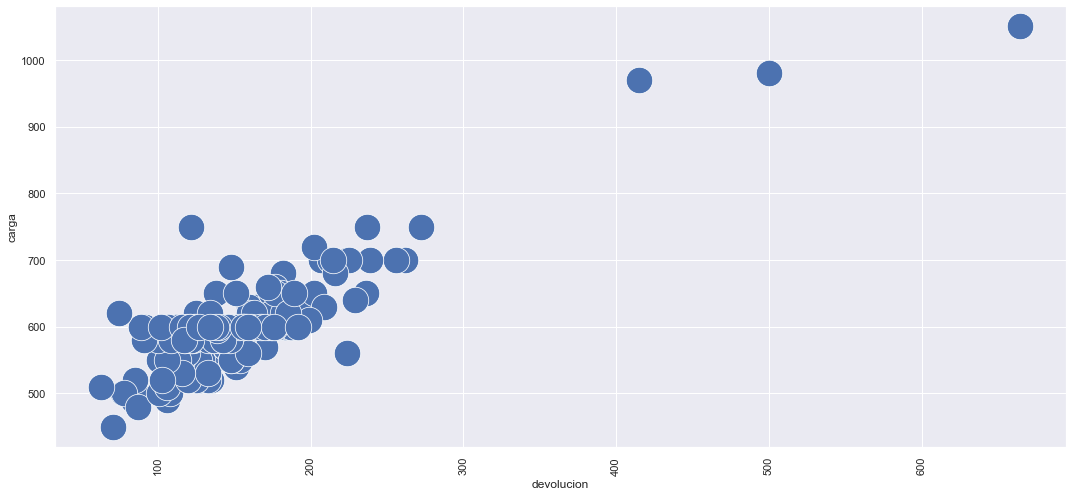

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize = (15,7))
# plot = sns.scatterplot(x = 'FechaCirculacion', y  = 'carga', hue = 'Damage Incident', data = df, s = 100)

plot = sns.scatterplot(x = 'devolucion', y  = 'carga', data = df, s = 700)
for item in plot.get_xticklabels():
    item.set_rotation(90)

plt.tight_layout()
plt.show()
plt.savefig( 'Relacion_Carga_Devolucion.png' )

In [6]:
cov = np.sum((df.carga - df.carga.mean())*(df.devolucion - df.devolucion.mean()))/+df.carga.size
corr = cov/(df.carga.std()*df.devolucion.std())
print("Correlacion: ", corr)


Correlacion:  0.8661888518435922


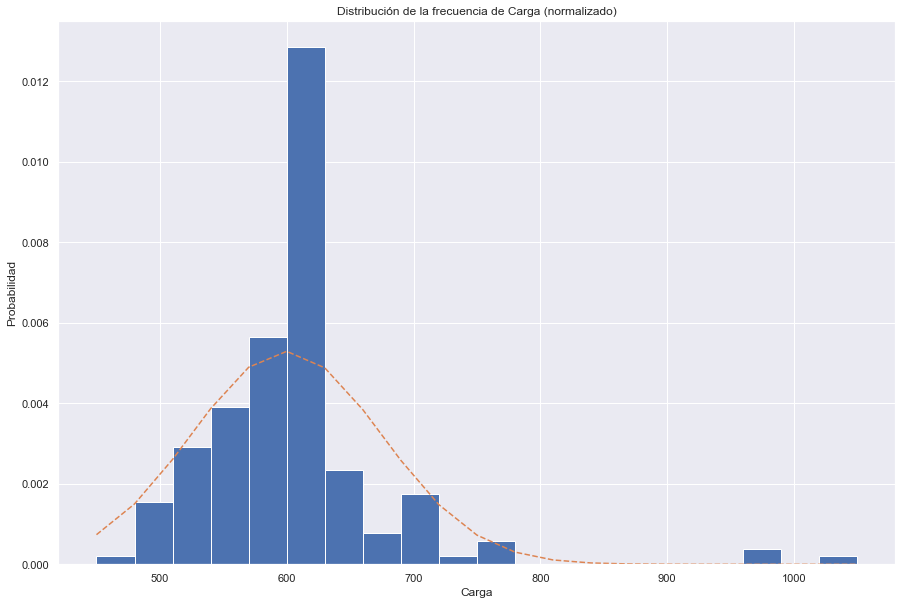

In [7]:
# Histograma de Carga

mu = df.carga.mean()  # mean of distribution
sigma = df.carga.std()  # standard deviation of distribution
num_bins = 20

fig, ax = plt.subplots()
n, bins, patches = ax.hist(df["carga"], num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Carga')
ax.set_ylabel('Probabilidad')
ax.set_title(r'Distribución de la frecuencia de Carga (normalizado)')
fig.set_size_inches(15, 10)
plt.show()
fig.savefig( 'Distribuci.png' )

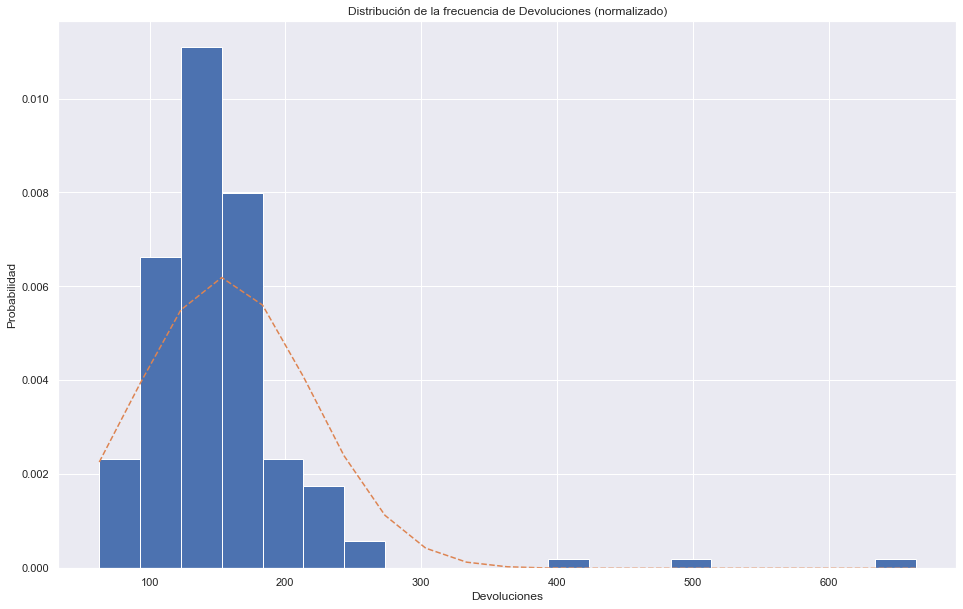

In [8]:
# Histograma Devoluciones
mu = df.devolucion.mean()  # mean of distribution
sigma = df.devolucion.std()  # standard deviation of distribution
num_bins = 20

fig, ax = plt.subplots()
n, bins, patches = ax.hist(df["devolucion"], num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Devoluciones')
ax.set_ylabel('Probabilidad')
ax.set_title(r'Distribución de la frecuencia de Devoluciones (normalizado)')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
fig.set_size_inches(15, 10)
plt.show()


Regresion aplicando SVM (Support Vector Machine)


In [17]:
def MSE(y,y_pred):
    '''Calcula Mean Squared Error'''
    assert(len(y) == len(y_pred))
    n = len(y)
    return ((y - y_pred)**2).sum()/n

In [91]:
X = df.carga.values.astype(int)
y = df.devolucion.values.astype(int)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

print("X: ", X.shape)
print("y: ", y.shape)

X:  (171, 1)
y:  (171, 1)


In [92]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [93]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [94]:
# Matriz de confusión 
def matriz_de_confusion(Y_Test, Y_Pred):
    cm = confusion_matrix(Y_Test, Y_Pred)

    fig, ax = plt.subplots(figsize=(20,15))
    ax.matshow(cm)
    plt.title('Matriz de Confusión', fontsize=20)
    plt.ylabel('Etiqueta Verdadera', fontsize=15)
    plt.xlabel('Etiqueta Predicha', fontsize=15)
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.01f}'.format(z), ha='center', va='center')

In [95]:
# Reporte de Clasificación
def reporte_de_clasificacion(Y_Test, Y_Pred):
    print(classification_report(Y_Test, Y_Pred))

In [96]:
# Visualizando los resultados en el set de testing
def grafico_resultados(X_Set, Y_Set):
#X_Set, Y_Set = X_Test, Y_Test

    X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01), 
                         np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

    plt.figure(figsize=(10,5))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(['red', 'green']))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y_Set)):
        plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                    c = ListedColormap(('black', 'green'))(i), label = j)
    plt.title('Support Vector Machine (Conjunto de Testing)', fontsize=20)
    plt.xlabel('Edad', fontsize=15)
    plt.ylabel('Salario Estimado', fontsize=15)
    plt.legend()
    plt.show()

In [97]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

classifier = SVC(C = .1, kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, Y_Train)

C:\Users\Alejandro\Miniconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [98]:
Y_Pred = classifier.predict(X_Test)

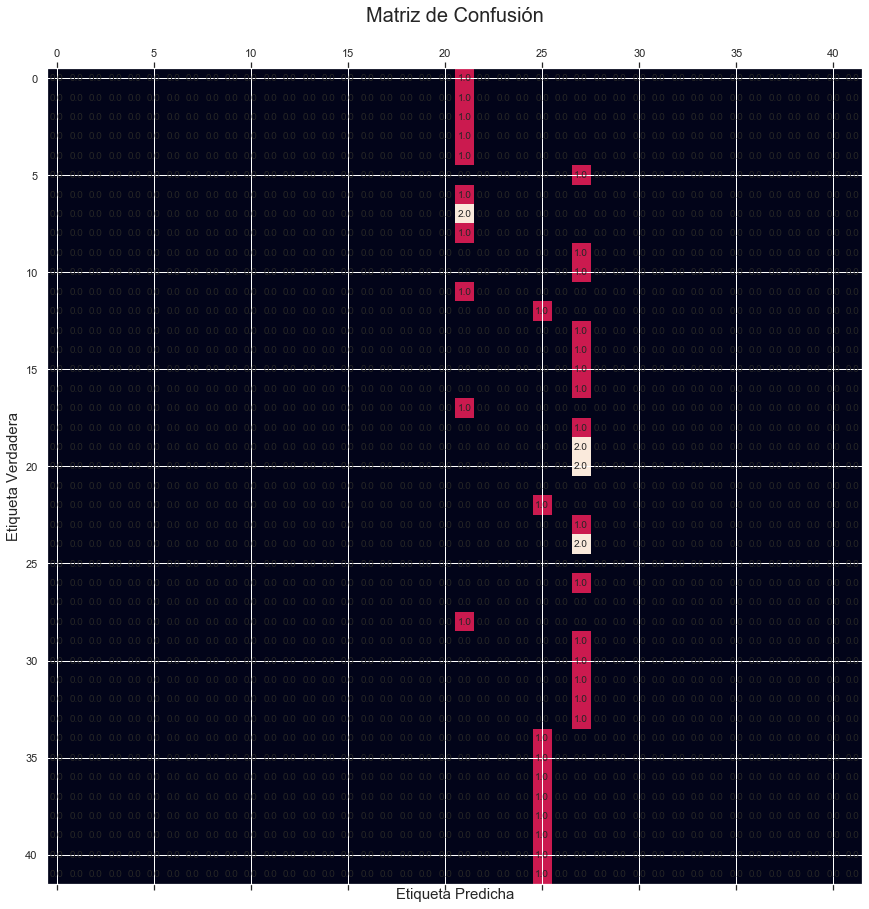

In [99]:
matriz_de_confusion(Y_Test, Y_Pred)


reporte_de_clasificacion(Y_Test, Y_Pred)

REGRESION LINEAL

In [100]:
y = df.tapa.values.astype(int)
X = df.carga.values.astype(int)

In [101]:
X = X.reshape(-1,1)
print(X.shape)

(171, 1)


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 1)
(52, 1)
(119,)
(52,)


In [103]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[0.00490208]
-1.6731618736623401
1


In [105]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.09078390490917959
Error en datos de test: 0.07805825097418687


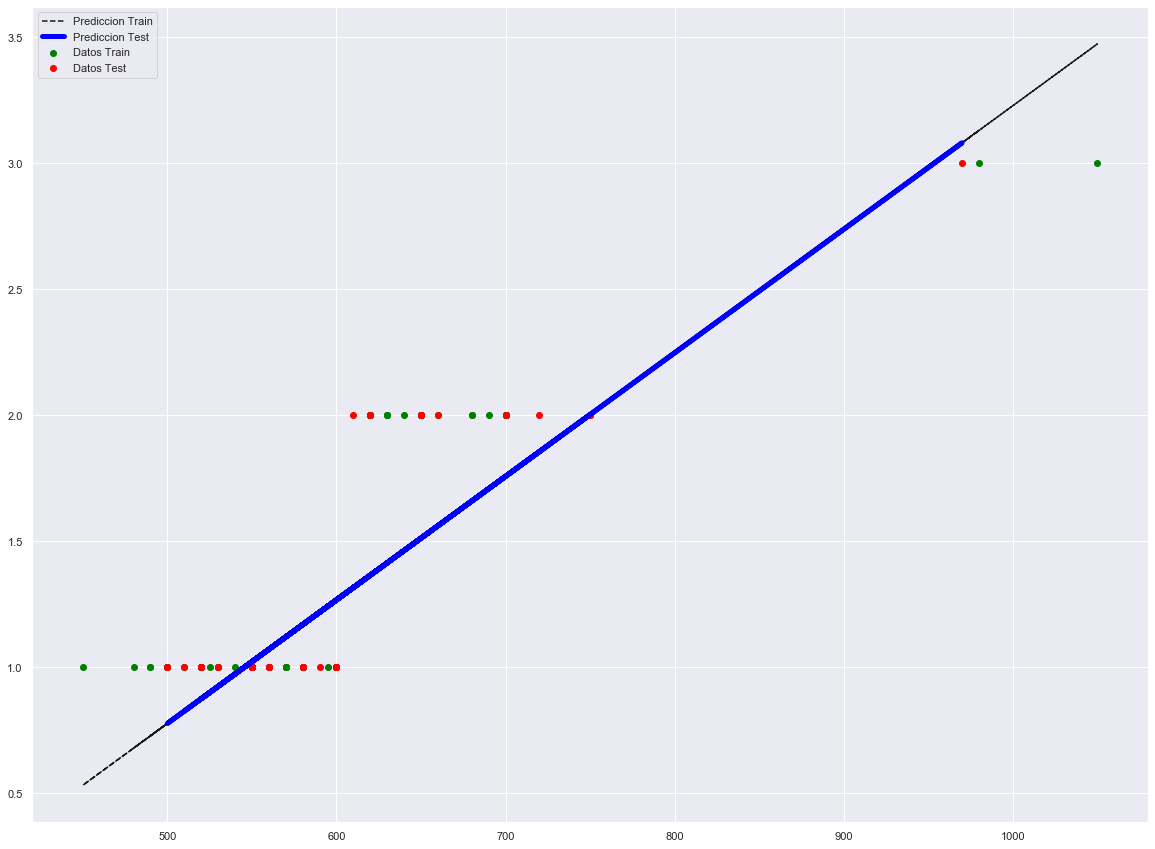

In [107]:
plt.figure(figsize = (20,15))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.legend()
plt.show()
